<div style="background-color: #007bff; color: white; font-family: 'Arial', sans-serif; padding: 10px; border-radius: 5px;">
    <h1>Importing Libraries and Files</h1>
</div>


In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
%matplotlib inline


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# main_analysis.py
from utils import (process_comments, plot_sentiment_distribution, scatter_vader_vs_textblob, generate_filtered_wordcloud, 
                   plot_sentiment_comparison_boxplot,analyze_comment_length)



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/oeendrila/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
Device set to use mps:0


In [6]:
# Step 1
con_df = pd.read_csv("/Users/oeendrila/Desktop/ELON/ANALYSIS/combined /conservative copy/clean_con_data.csv")  # Replace with your CSV file path
ms_df = pd.read_csv('/Users/oeendrila/Desktop/ELON/ANALYSIS/combined /mainstream  copy/clean_ms_data.csv')



<div style="background-color: #007bff; color: white; font-family: 'Arial', sans-serif; padding: 10px; border-radius: 5px;">
    <h1>Basic Exploratory Analyses</h1>
</div>

In [8]:
#checking basic info regarding mainstream channel comments

ms_df.shape

(4470, 3)

Basic Statistics for Comment Length and Word Count:
       Comment_Length   Word_Count
count     4470.000000  4470.000000
mean        94.361745    16.834228
std        116.492938    20.374158
min          1.000000     1.000000
25%         32.000000     6.000000
50%         63.000000    11.000000
75%        114.000000    20.000000
max       2184.000000   402.000000


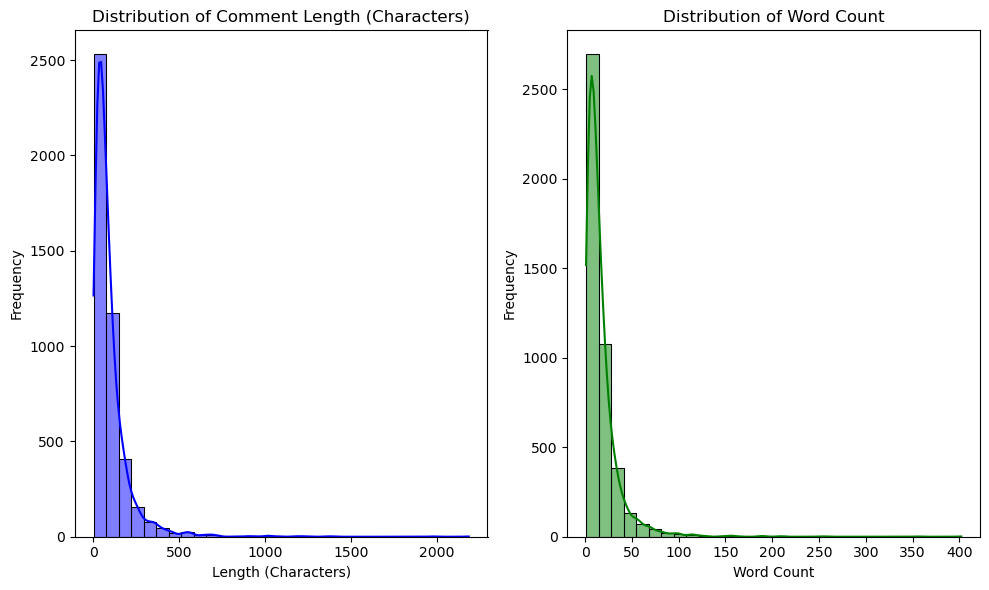

Video ID                   User ID  \
0                DW  UCgDuFgJQ4a0TJ8HCDnW8i3w   
1                DW  UCSkVAxUmDh8jqxK6MLeBhSA   
2                DW  UCleLTG0Vm5s3jNcoZOdNGCQ   
3                DW  UCLV3vjTw_kSdKOQZlDSHB2A   
4                DW  UC1ozNqKFTv4lPOOdU3rtBbg   
...             ...                       ...   
4465  Guardian_News  UCV4Bwd1jNMSEPwHVRUjrzOQ   
4466  Guardian_News  UCoBOXa94R7xqmPC_O9l6DkA   
4467  Guardian_News  UC8HmRcsoXldiE-rE3mn7QoQ   
4468  Guardian_News  UCzkMPnedRxWURF6anK7D1Uw   
4469  Guardian_News  UCXvGqFEFPHl3F4iUe4mq9ig   

                                                Comment  Comment_Length  \
0     He slapped his chest and extended his arm with...             123   
1                              Guess who&#39;s back !WP              24   
2                                      During ay speech              16   
3       So? The bloody left is bloody EXTREME!!! ü§¨ü§¨ü§¨ü§¨ü§¨ü§¨              47   
4               Teslas are gonna fly off those lots!! üòÇ              39   
...                                                 ...             ...   
4465  UsA on free falling<br>Don&#39;t forget that e...             124   
4466            World goes crazy, these people are evil              39   
4467  I predicted there would be swastikas at the in...              78   
4468                  What can save the U.S! Civil war?              33   
4469                                   Disgusting human              16   

      Word_Count  
0             22  
1              4  
2              3  
3              8  
4              8  
...          ...  
4465          21  
4466           7  
4467          12  
4468           7  
4469           2  

[4470 rows x 5 columns]

In [9]:
analyze_comment_length(ms_df, text_column = 'Comment')

In [10]:
#checking data details about comment section on consolidated conservative channels

con_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10950 entries, 0 to 10949
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Video ID  10950 non-null  object
 1   User ID   10950 non-null  object
 2   Comment   10950 non-null  object
dtypes: object(3)
memory usage: 256.8+ KB


Basic Statistics for Comment Length and Word Count:
       Comment_Length    Word_Count
count    10950.000000  10950.000000
mean       158.755068     27.975434
std        227.930917     37.963943
min          1.000000      1.000000
25%         53.000000      9.000000
50%        100.000000     18.000000
75%        186.000000     33.000000
max      10858.000000   1488.000000


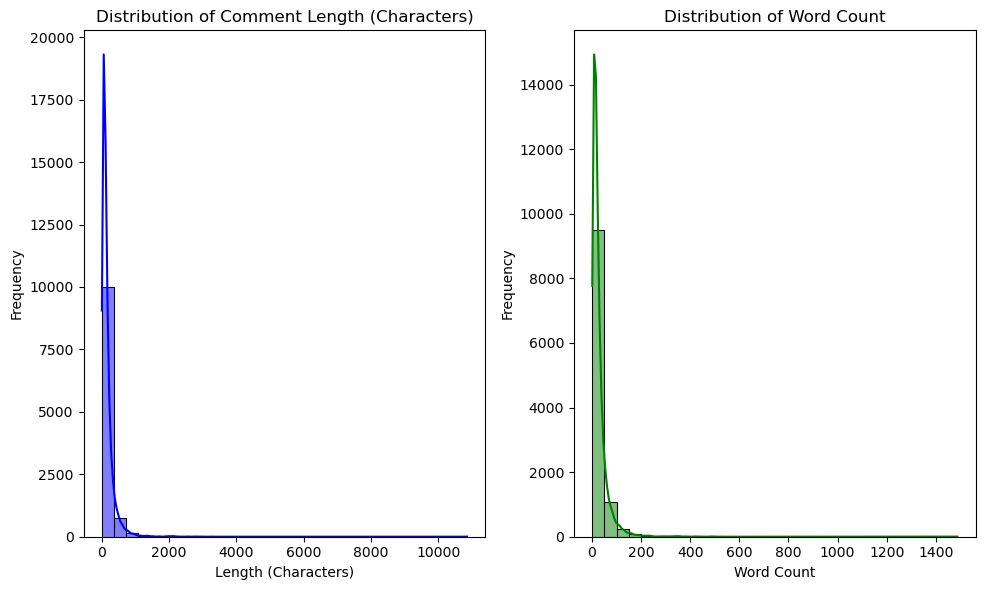

Video ID                   User ID  \
0      Ben_Shapiro  UC3vXomPY9K1_uq4qQptnOPg   
1      Ben_Shapiro  UCd5UxmszI5LXSE8X_okFl_w   
2      Ben_Shapiro  UCbX0BniSpYGNBMR-DkChrEA   
3      Ben_Shapiro  UCkmV2gim5eIXFjCv7f-95gg   
4      Ben_Shapiro  UCk0iNjPERJSX7uQJeHbjHTg   
...            ...                       ...   
10945   Dave_Rubin  UCsE5JBSSf8veqDudbb_Qn5Q   
10946   Dave_Rubin  UCBxusOYqMU6rcfVpRFYkcfw   
10947   Dave_Rubin  UC5IrAqpRgh7iTxdsyAPZRwA   
10948   Dave_Rubin  UCwHsOUpK-4WNfvJOgNoALeg   
10949   Dave_Rubin  UCI3ZaxE2RSxoWYAkYnVWMeg   

                                                 Comment  Comment_Length  \
0            A jew sweeping a Nazi Salute is comedy gold              43   
1      Pls tell me this is a joke, Elon is a nazi? Re...              52   
2      I‚Äôm German and he would be arrested here for t...              50   
3      Shapiro has lost it! Elon spoke at a AfD rally...             199   
4      ü§£ü§£What did your hero Bibi say again to congres...              74   
...                                                  ...             ...   
10945  One of the reason Trump won.... a majority is ...              64   
10946                            Cnn can&#39;t stop lyin              23   
10947  As a 41yo man I have never been more proud to ...             128   
10948  Considering the fact that he is investing in c...             147   
10949  So funny they are trying to push this as a Naz...             148   

       Word_Count  
0               9  
1              12  
2              10  
3              39  
4              14  
...           ...  
10945          13  
10946           4  
10947          27  
10948          26  
10949          30  

[10950 rows x 5 columns]

In [11]:
analyze_comment_length(con_df, text_column = 'Comment')

<div style="background-color: #007bff; color: white; font-family: 'Arial', sans-serif; padding: 10px; border-radius: 5px;">
    <h1>Applying Sentiment Analyses and Visualisations</h1>
</div>


In [13]:
# Step 2: VADER and TextBlob with process comments function 
ms_df = process_comments(ms_df)
con_df= process_comments(con_df)


In [14]:
# Step 3: checking the results 
ms_df.sample(3)

Video ID                   User ID  \
70         DW  UCuQVMSS49Pp5fm8DR0BdgRw   
3230    MSNBC  UCnoi4_aLvSTo9WhgqkvJGPg   
59         DW  UCpjojkvbHIucvTRk_85ZGaQ   

                                                Comment  Comment_Length  \
70                       Welcome, american dictators...              30   
3230  Its plan and simple, he&#39;s eluding the ushe...             138   
59    My heart for you salute. Read your history people              49   

      Word_Count VADER_Score  VADER_Sentiment TextBlob_Score  \
70             3    Positive           0.4588       Positive   
3230          23    Positive           0.6801        Neutral   
59             9     Neutral           0.0000        Neutral   

      TextBlob_Sentiment  
70                   0.4  
3230                 0.0  
59                   0.0

In [15]:
con_df.sample(3)

Video ID                   User ID  \
8173  Candace_Owens  UCuf3MZXzTEUQUcGTJw7T1kw   
4419  Candace_Owens  UCg7CtAlADzoEW6hxGx7YlqQ   
9240     Dave_Rubin  UCvEGHllcG5bKvTP0T9qvhIA   

                                                Comment  Comment_Length  \
8173  You are &#39; my people&#39; Candace! Your sar...              73   
4419  I think Trump should nationalize the Federal r...             168   
9240  CNN viewers don‚Äôt know what love and happiness...             145   

      Word_Count VADER_Score  VADER_Sentiment TextBlob_Score  \
8173          12    Positive           0.5093       Positive   
4419          32    Positive           0.5859       Positive   
9240          28    Positive           0.9118       Positive   

      TextBlob_Sentiment  
8173            0.850000  
4419            0.350000  
9240            0.421875

In [16]:
print(con_df['VADER_Sentiment'].dtype)
print(con_df['TextBlob_Sentiment'].dtype)


float64
float64


<div style="background-color: #007bff; color: white; font-family: 'Arial', sans-serif; padding: 10px; border-radius: 5px;">
    <h3>Average of Vader and Textblob</h3>
</div>


In [18]:
#calculating average score counts for mainstream counts
vader_counts_ms = ms_df.groupby("VADER_Score")["VADER_Score"].count()
vader_counts_ms

VADER_Score
Negative    1288
Neutral     1634
Positive    1548
Name: VADER_Score, dtype: int64

In [19]:
#calculating average score counts for conservative comments 
vader_counts_con = con_df.groupby("VADER_Score")["VADER_Score"].count()
vader_counts_con

VADER_Score
Negative    3699
Neutral     2752
Positive    4499
Name: VADER_Score, dtype: int64

In [20]:
#average vader sentiment score , mainstream channel comments

average_vader_score = ms_df['VADER_Sentiment'].mean()

print(f"Average VADER Compound Score: {average_vader_score:.4f}")


Average VADER Compound Score: 0.0281


In [21]:
ms_df.groupby('VADER_Score').count()

Video ID  User ID  Comment  Comment_Length  Word_Count  \
VADER_Score                                                           
Negative         1288     1288     1288            1288        1288   
Neutral          1634     1634     1634            1634        1634   
Positive         1548     1548     1548            1548        1548   

             VADER_Sentiment  TextBlob_Score  TextBlob_Sentiment  
VADER_Score                                                       
Negative                1288            1288                1288  
Neutral                 1634            1634                1634  
Positive                1548            1548                1548

In [22]:
#average vader score , conservative channel comments

average_vader_score = con_df['VADER_Sentiment'].mean()

print(f"Average VADER Compound Score: {average_vader_score:.4f}")


Average VADER Compound Score: 0.0500


In [23]:
#calculating average textblob score for mainstream comments 

average_textblob_score = ms_df["TextBlob_Sentiment"].mean()
print(f"Average TextBlob Sentiment Score: {average_textblob_score:.4f}")



Average TextBlob Sentiment Score: 0.0351


In [24]:
# Count of each textblob sentiment category for mainstream comments
textblob_counts = ms_df.groupby("TextBlob_Score")["TextBlob_Score"].count()
print (textblob_counts)


TextBlob_Score
Negative     859
Neutral     2160
Positive    1451
Name: TextBlob_Score, dtype: int64


In [25]:
#calculating average textblob score for conservative comments 

average_textblob_score = con_df["TextBlob_Sentiment"].mean()
print(f"Average TextBlob Sentiment Score: {average_textblob_score:.4f}")


Average TextBlob Sentiment Score: 0.0263


In [26]:
# Count of each textblob sentiment category for conservative comments
textblob_counts = con_df.groupby("TextBlob_Score")["TextBlob_Score"].count()
print (textblob_counts)


TextBlob_Score
Negative    3012
Neutral     3653
Positive    4285
Name: TextBlob_Score, dtype: int64


In [27]:
# Step 4: save files for later visualisation
ms_df.to_csv("ms_sentiment_analysis.csv", index = False) 
con_df.to_csv("con_sentiment_analysis.csv", index = False)


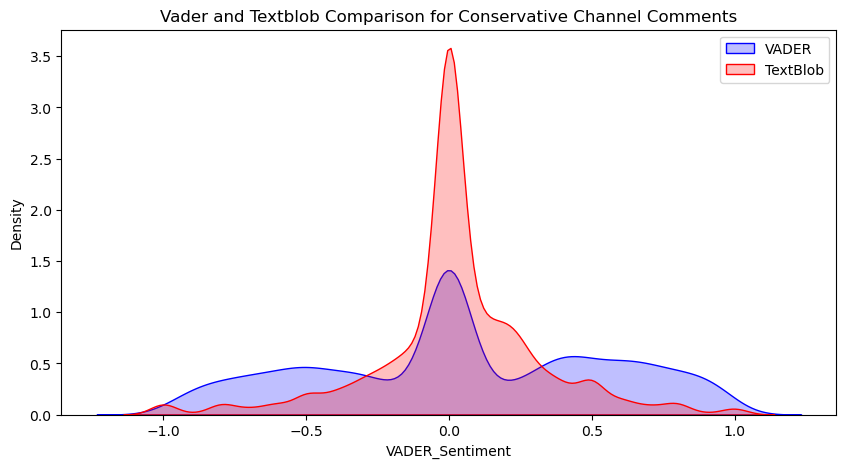

In [28]:
# Step 5a: Visualising the results comparatively
plot_sentiment_distribution(con_df, title = "Vader and Textblob Comparison for Conservative Channel Comments")

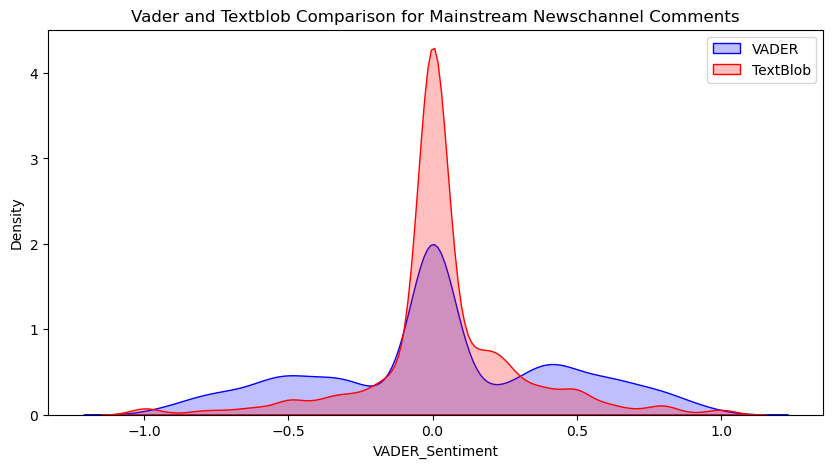

In [29]:
# Step 5b: Visualising the results comparatively
plot_sentiment_distribution(ms_df, title = "Vader and Textblob Comparison for Mainstream Newschannel Comments")

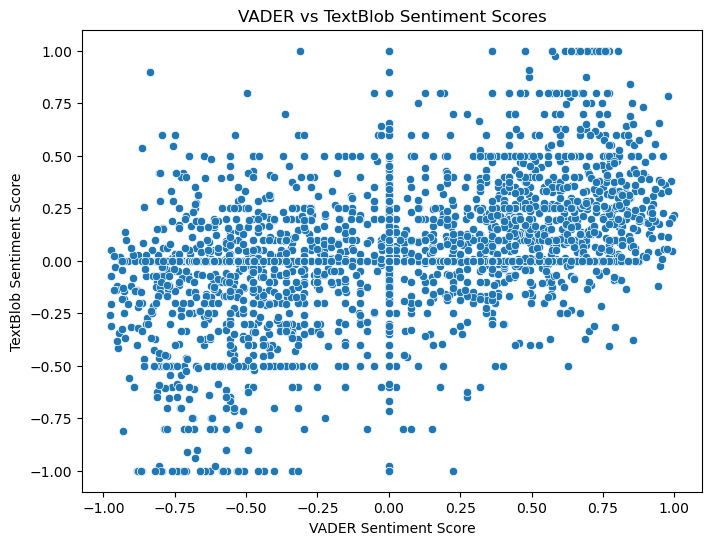

In [30]:
# Step 5c: Scatter Plot Comparing VADER vs TextBlob Sentiment Scores
scatter_vader_vs_textblob(ms_df, "VADER vs TextBlob Sentiment Scores")


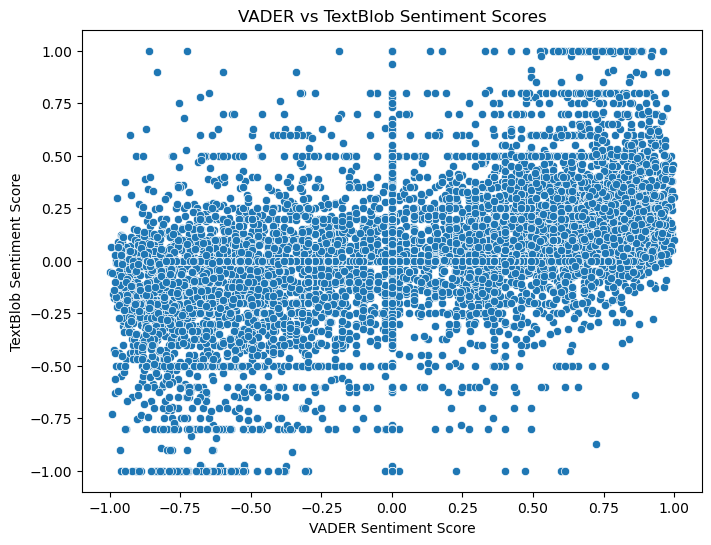

In [31]:
# Step 5d: Scatter Plot Comparing VADER vs TextBlob Sentiment Scores
scatter_vader_vs_textblob(con_df, "VADER vs TextBlob Sentiment Scores")


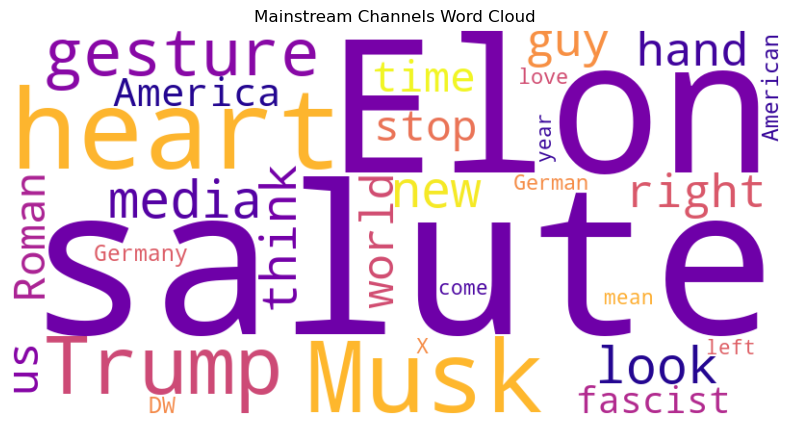

In [32]:
# Step 6a: Generate Word Cloud for the Comments
custom_stopwords = {"https", "br", "quot", "either", "used", "clearly","u", "don", "make", "even", "going", "didn", "know", "see", "way","go", "said", "say", "re", "really", "say", "read", "need", "sure", "making", "everything","everyone", "arm", "little", "sure", "might", "take", "made", "maybe","clip", "many","might", "twice", "amp", "wasn","lot", "yall", "goes",  "got", "href", "one","will", "people", "thing", "is", "yeah", "man", "m", "want", "put", "trying","b", "side", "oh", "s", "t", "that", "now", "done", "wasn't" }
generate_filtered_wordcloud(ms_df, "Comment", "Mainstream Channels Word Cloud", extra_stopwords=custom_stopwords)

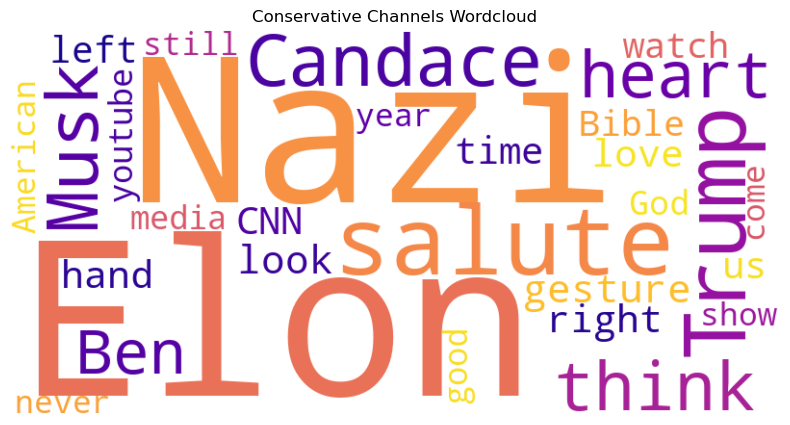

In [33]:
# Step 6b: Generate Word Cloud for the Comments
generate_filtered_wordcloud(con_df, "Comment", "Conservative Channels Wordcloud", extra_stopwords=custom_stopwords)


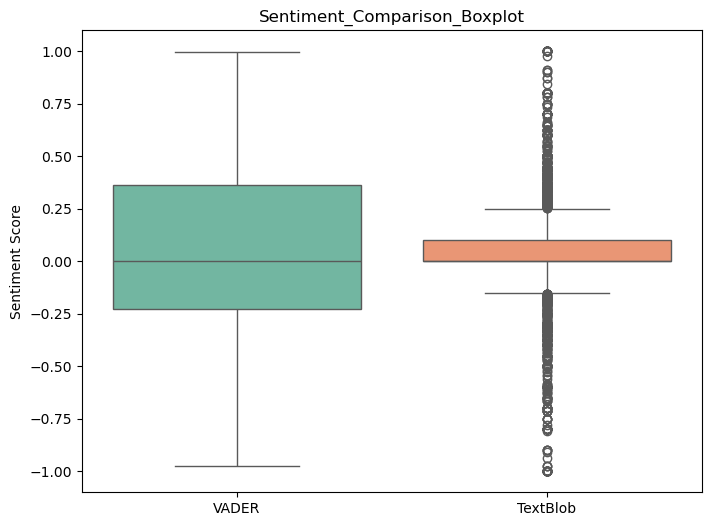

In [34]:
# sentiment comparison boxplot 
plot_sentiment_comparison_boxplot(ms_df, "Sentiment_Comparison_Boxplot")

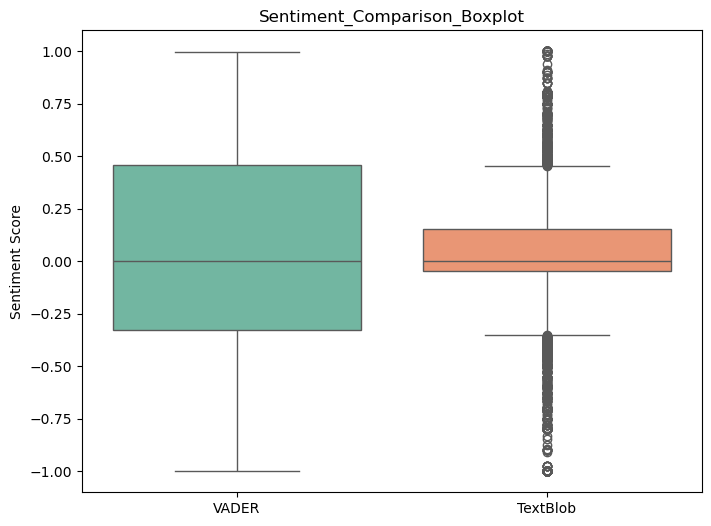

In [35]:
#sentiment comparison boxplot
plot_sentiment_comparison_boxplot(con_df, "Sentiment_Comparison_Boxplot")

<div style="background-color: #007bff; color: white; font-family: 'Arial', sans-serif; padding: 10px; border-radius: 5px;">
    <h1>Comparing Results with Bert</h1>
</div>


In [37]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"


In [38]:
pip install transformers torch


Note: you may need to restart the kernel to use updated packages.


In [39]:
from transformers import pipeline

In [40]:
# APPLYING BERT TO CONSERVATIVE YOUTUBE COMMENTSLoad BERT Sentiment Analysis Pipeline

sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

# Reducing number of comments to anable BERT tow ork 
small_con =con_df.sample(20)  

# Checking presence of column "Comment"
if "Comment" not in small_con.columns:
    raise ValueError("The dataset must have a column named 'Comment'.")

# Applying  BERT Sentiment Analysis
def analyze_bert_sentiment(text):
    result = sentiment_pipeline(text[:512])[0]  # Truncate to max 512 tokens
    return result['label'], result['score']

# Apply the function to comments
small_con[['BERT_Sentiment', 'BERT_Score']] = small_con['Comment'].apply(lambda x: pd.Series(analyze_bert_sentiment(str(x))))

# Save results for review
small_con.to_csv("bert_sentiment_con_results.csv", index=False)


Device set to use mps:0


In [41]:
small_con[['Video ID', 'Comment', 'BERT_Sentiment', 'BERT_Score']]



Video ID                                            Comment  \
9500      Dave_Rubin  I don‚Äôt know what you all are smoking to say t...   
3374   Candace_Owens                                              Takk!   
10190     Dave_Rubin                                         The cringe   
6858   Candace_Owens            Damn.. ADL propaganda worked on Candace   
8489   Candace_Owens  The Bellamy Salute is the original Salute to t...   
239      Ben_Shapiro  Ben, Elon LITERALLY believes in eugenics. He t...   
1865     Ben_Shapiro  bens under the weather when I&#39;m under the ...   
8982      Dave_Rubin  CNN is cowards for not showing or talking abou...   
10065     Dave_Rubin  What a heartfelt thank you from Elon, made eve...   
5626   Candace_Owens  Since Elon was exempted for his Hitler salute,...   
4222   Candace_Owens  Nothing to see! He didn&#39;t mean anything by...   
4462   Candace_Owens  Candace could you please look into the orthodo...   
1055     Ben_Shapiro                     These people are mentally ill.   
2275     Ben_Shapiro  Exactly !<br>There is a difference between <br...   
1329     Ben_Shapiro                              Maybe Ben is one too.   
8566   Candace_Owens  It doesn‚Äôt mean anything!!! He is happy about ...   
10731     Dave_Rubin  &quot;our viewers are smart&quot; did we need ...   
4757   Candace_Owens  I&#39;ve seen several archival photos of some ...   
4675   Candace_Owens  Trump supports Noahide, which will persecute C...   
4278   Candace_Owens  Two women at the start. Imagine been married t...   

      BERT_Sentiment  BERT_Score  
9500        NEGATIVE    0.991356  
3374        NEGATIVE    0.990723  
10190       NEGATIVE    0.999639  
6858        NEGATIVE    0.997545  
8489        POSITIVE    0.985131  
239         NEGATIVE    0.979313  
1865        NEGATIVE    0.997615  
8982        NEGATIVE    0.999712  
10065       POSITIVE    0.999866  
5626        POSITIVE    0.848277  
4222        NEGATIVE    0.997183  
4462        POSITIVE    0.996417  
1055        NEGATIVE    0.999402  
2275        NEGATIVE    0.996494  
1329        POSITIVE    0.921927  
8566        POSITIVE    0.988393  
10731       NEGATIVE    0.960066  
4757        POSITIVE    0.999155  
4675        NEGATIVE    0.972002  
4278        NEGATIVE    0.995938

In [42]:
#visualisation here: 


In [43]:
#APPLYING BERT TO MAINSTREAM VIDEO COMMMENTS 
# Take a small batch (e.g., first 10 comments)
small_ms =ms_df.sample(20)  # Adjust number if needed

#Ensuring "Comment" is present
if "Comment" not in small_ms.columns:
    raise ValueError("The dataset must have a column named 'Comment'.")

# Apply BERT Sentiment Analysis
def analyze_bert_sentiment(text):
    result = sentiment_pipeline(text[:512])[0]  # Truncate to max 512 tokens
    return result['label'], result['score']

# Apply the function to comments
small_ms[['BERT_Sentiment', 'BERT_Score']] = small_ms['Comment'].apply(lambda x: pd.Series(analyze_bert_sentiment(str(x))))

# Save results for review
small_ms.to_csv("bert_sentiment_ms_results.csv", index=False)


In [44]:
small_ms[['Video ID', 'Comment', 'BERT_Sentiment', 'BERT_Score']]

Video ID                                            Comment  \
885              DW  No debate - this is a salute that is currently...   
3296          MSNBC          Wow one side, and untruthful ‚Äúreporting ‚Äú   
1848             DW               No watch the whole context of video.   
2349             DW  He boasted to Joe Rogan he was a top video gam...   
2745             DW  ‚ÄúThere‚Äôs only one person who knows if that was...   
3145             DW  If you look closely, he was simply demonstrati...   
3733          MSNBC                 Crafted for the ambitious. $X.AI50   
1095             DW  This is an example of why the main stream medi...   
2422             DW                                    scottish accent   
465              DW  I guess everyone ignores the fact he grabbed a...   
3441          MSNBC                         This news is a hot mess. üòÇ   
4431  Guardian_News                                  &#39;Appears&#39;   
2246             DW  &quot;gesture&quot; &quot;resembling&quot;. Th...   
28               DW           Elon , why are you saluting like that?‚ù§‚ù§   
1181             DW  This immigrant has purchased the USA governmen...   
1231             DW        Democrats have been saying this for years.üòÇ   
4107  Guardian_News                                      Hail Musk! üëåüèª   
2395             DW                            This is a Roman salute.   
1127             DW  It looks to me like he was gesturing that his ...   
1816             DW  It&#39;s not illegal...that will be his defens...   

     BERT_Sentiment  BERT_Score  
885        NEGATIVE    0.999280  
3296       NEGATIVE    0.945828  
1848       NEGATIVE    0.994554  
2349       NEGATIVE    0.993555  
2745       NEGATIVE    0.998902  
3145       POSITIVE    0.999779  
3733       POSITIVE    0.867003  
1095       NEGATIVE    0.985331  
2422       POSITIVE    0.995094  
465        NEGATIVE    0.998727  
3441       NEGATIVE    0.999803  
4431       POSITIVE    0.911353  
2246       NEGATIVE    0.973569  
28         NEGATIVE    0.996465  
1181       NEGATIVE    0.896663  
1231       NEGATIVE    0.902216  
4107       POSITIVE    0.998748  
2395       POSITIVE    0.998848  
1127       POSITIVE    0.998560  
1816       NEGATIVE    0.900483

<div style="background-color: #007bff; color: white; font-family: 'Arial', sans-serif; padding: 10px; border-radius: 5px;">
    <h3>Comparing with RoBERTa</h3>
</div>


NameError: name 'small_ms' is not defined

In [1]:
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.nn.functional import softmax


#Loading Pre-trained RoBERTa Model for Sentiment Analysis
model_name = "cardiffnlp/twitter-roberta-base-sentiment"  # Pre-trained sentiment model
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name)

#Function for Sentiment Analysis
def get_sentiment(Comment):
    if pd.isna(Comment) or len(Comment.strip()) == 0:  # Handle empty comments
        return "NEUTRAL", 0.0

    # Tokenize text
    inputs = tokenizer(Comment, return_tensors="pt", padding=True, truncation=True, max_length=512)

    # Run model and get logits
    with torch.no_grad():
        logits = model(**inputs).logits

    # Convert logits to probabilities
    probs = softmax(logits, dim=-1)

    # Get sentiment label
    sentiment_labels = ["NEGATIVE", "NEUTRAL", "POSITIVE"]
    sentiment = sentiment_labels[torch.argmax(probs).item()]
    confidence = probs.max().item()  # Confidence score

    return sentiment, confidence

#apply analysis to each comment
ms_df[["Sentiment", "Confidence"]] = ms_df["Comment"].apply(lambda x: pd.Series(get_sentiment(x)))

ms_df.to_csv("sentiment_resultsroberta.csv", index=False)



NameError: name 'ms_df' is not defined

<div style="background-color: #007bff; color: white; font-family: 'Arial', sans-serif; padding: 10px; border-radius: 5px;">
    <h1>Visualisations and Comparisons with BERT</h1>
</div>


In [ ]:
small_ms = pd.read_csv("/Users/oeendrila/Desktop/ELON/ANALYSIS/bert_sentiment_ms_results.csv")

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))  # Initialize the figure with correct parameters
sentiment_counts = small_ms['BERT_Sentiment'].value_counts()
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Sentiment Distribution for BERT Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.xticks(rotation=45)
plt.show()
